In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import zipfile
import os

# Define the path to the ZIP file (use raw string or double backslashes)
zip_file_path = r"C:\Users\jayan\OneDrive\Desktop\EDA\archive.zip"
extract_path = r"C:\Users\jayan\OneDrive\Desktop\EDA\New folder"

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed!")

Extraction completed!


In [3]:
import os
import pandas as pd

# Define the extracted folder path
extract_path = r"C:\Users\jayan\OneDrive\Desktop\EDA\New folder"

# List all CSV files in the extracted folder
csv_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]

if csv_files:
    # Automatically select the first CSV file found
    csv_file_path = os.path.join(extract_path, csv_files[0])
    print(f"Loading CSV file: {csv_file_path}")
    
    # Load CSV into a Pandas DataFrame with error handling
    try:
        df = pd.read_csv(csv_file_path)
        
        # Display basic info
        print("\nDataframe Info:")
        print(df.info())
        
        print("\nFirst 5 Rows:")
        print(df.head())

    except Exception as e:
        print(f"Error loading CSV: {e}")

else:
    print("No CSV files found in the extracted folder.")

Loading CSV file: C:\Users\jayan\OneDrive\Desktop\EDA\New folder\netflix_titles.csv

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

First 5 Rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      

In [6]:
print(df.isnull().sum())

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64


In [7]:
df.loc[:, 'director'] = df['director'].fillna("Unknown")
df.loc[:, 'cast'] = df['cast'].fillna("Unknown")
df.loc[:, 'country'] = df['country'].fillna("Unknown")

In [8]:
df = df.fillna({'director': 'Unknown', 'cast': 'Unknown', 'country': 'Unknown'})

In [9]:
print(df['type'].unique())  # Movie or TV Show?
print(df['rating'].unique())  # Different age ratings

['Movie' 'TV Show']
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']


In [10]:
print(df['date_added'].isna().sum())

10


In [14]:
df = df.dropna(subset=['date_added'])

In [15]:
df['date_added'] = df['date_added'].fillna("Unknown")

In [17]:
df['date_added'] = df['date_added'].str.strip()  # Remove extra spaces
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # Convert to datetime, set invalid dates to NaT

In [20]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


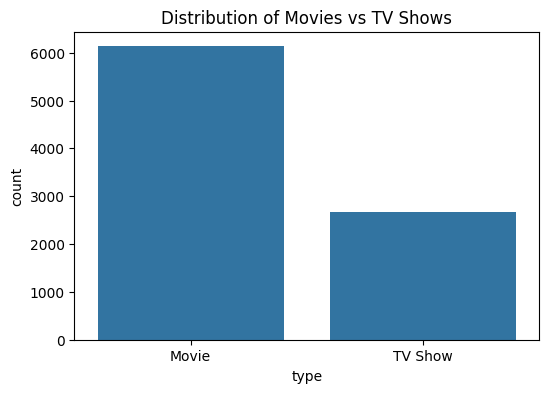

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(x=df['type'])
plt.title("Distribution of Movies vs TV Shows")
plt.show()

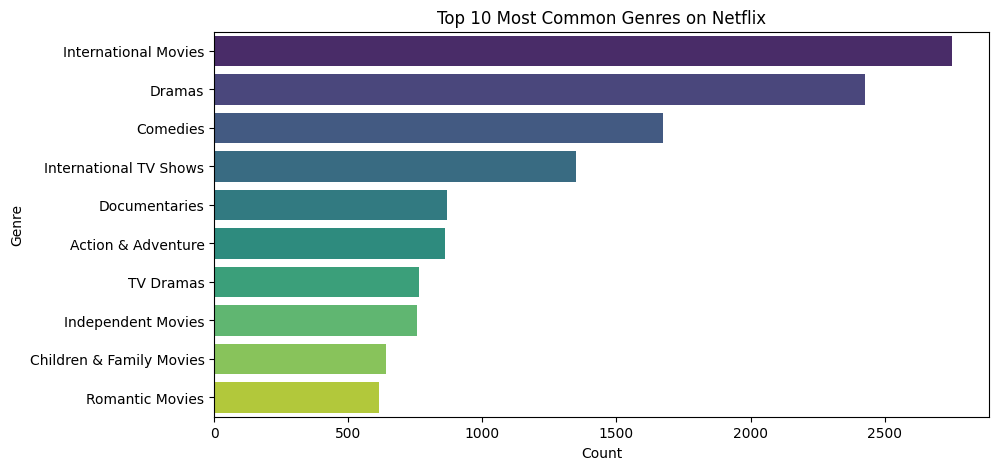

In [19]:
from collections import Counter

# Split listed_in column and count genres
genres = df['listed_in'].str.split(', ').explode()
top_genres = Counter(genres).most_common(10)

# Convert to DataFrame for visualization
genre_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Genre', data=genre_df, palette="viridis")
plt.title("Top 10 Most Common Genres on Netflix")
plt.show()

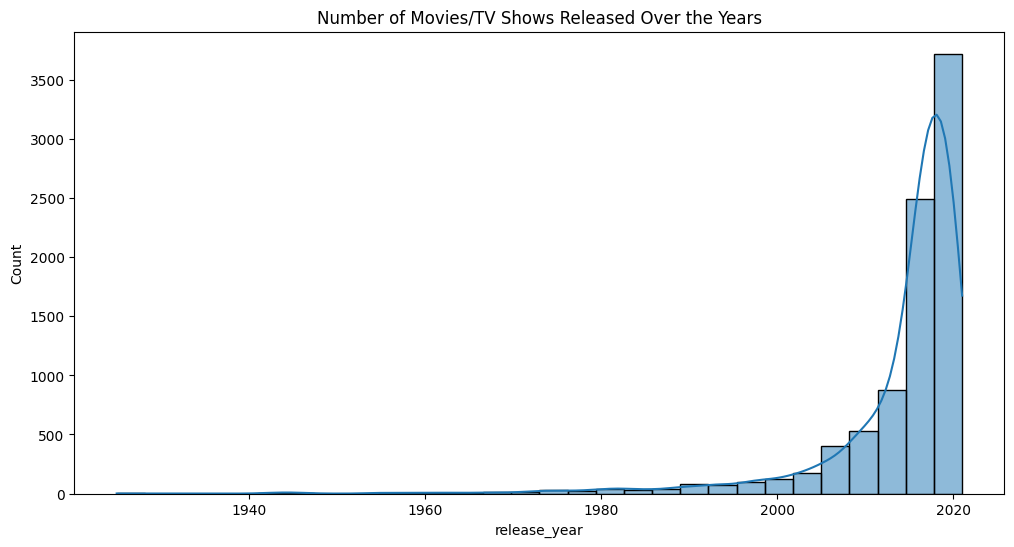

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title("Number of Movies/TV Shows Released Over the Years")
plt.show()

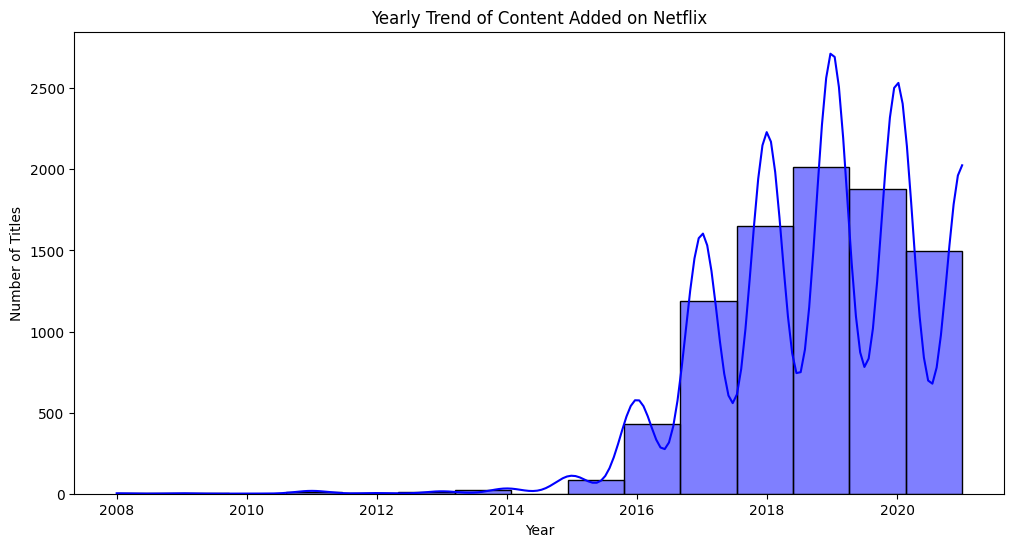

In [21]:
# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Plot number of titles added each year
plt.figure(figsize=(12,6))
sns.histplot(df['year_added'].dropna(), bins=15, kde=True, color="blue")
plt.title("Yearly Trend of Content Added on Netflix")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

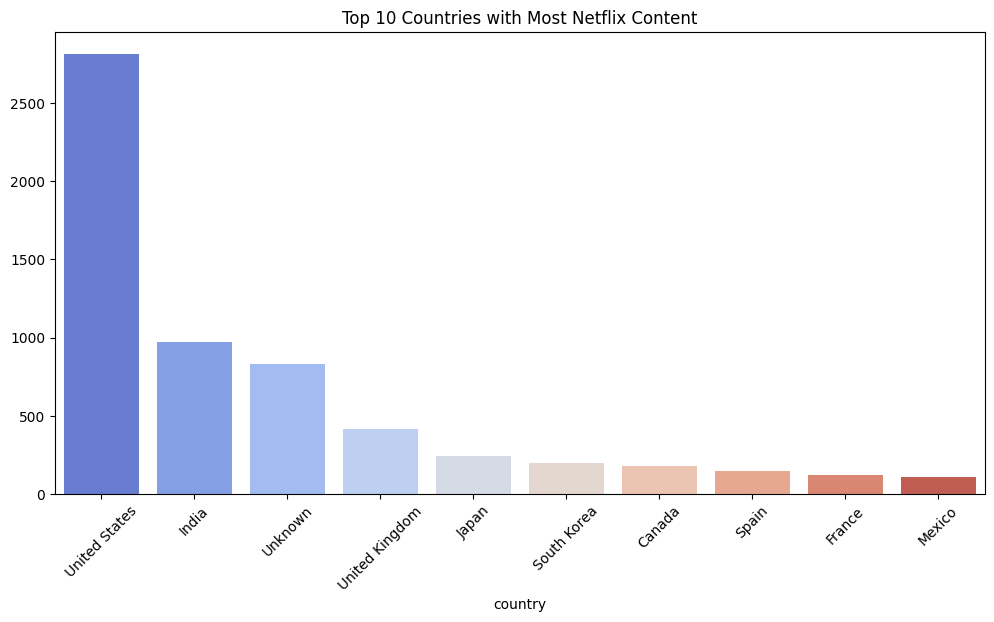

In [22]:
# Count top 10 countries
top_countries = df['country'].value_counts().head(10)

# Bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")
plt.title("Top 10 Countries with Most Netflix Content")
plt.xticks(rotation=45)
plt.show()

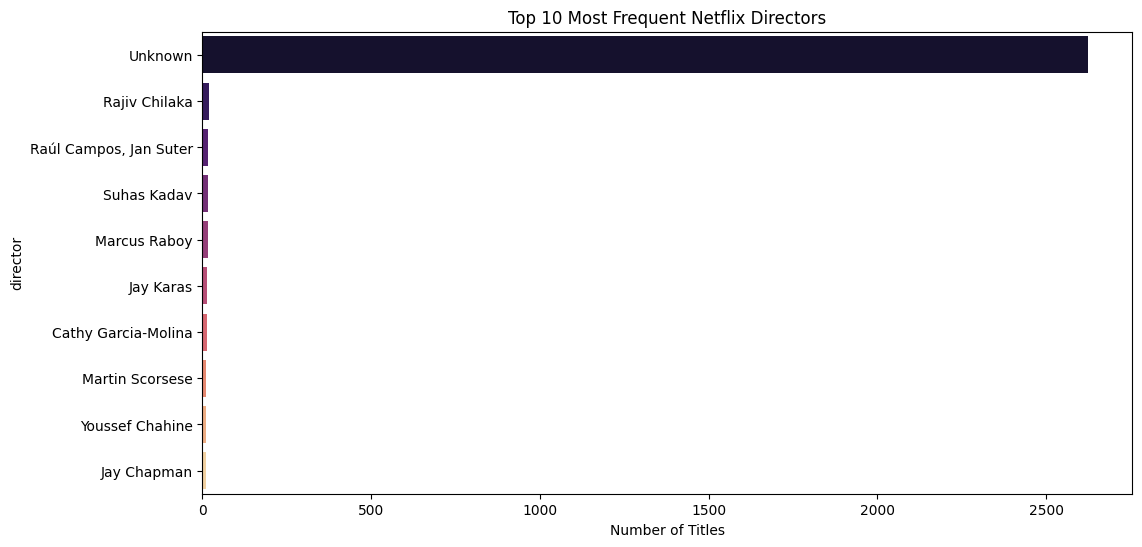

In [23]:
# Count top 10 directors
top_directors = df['director'].value_counts().head(10)

# Bar chart
plt.figure(figsize=(12,6))
sns.barplot(y=top_directors.index, x=top_directors.values, palette="magma")
plt.title("Top 10 Most Frequent Netflix Directors")
plt.xlabel("Number of Titles")
plt.show()